In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load training data
feature_data = pd.read_csv('features.csv')
feature_data = feature_data.drop(['Id'], axis=1)
feature_data.head()

,gabor_mean,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,haralick_8,...,lbp_mean,total_entropy,mean_red,mean_green,mean_blue,variance_red,variance_green,variance_blue,Pawpularity,Pawpularity_normalized
0,41.231567,0.000157,1278.492804,0.690157,2060.880358,0.062406,298.598931,6965.028630,8.182493,12.945641,...,5.505371,3.516038e+05,151.938206,149.545123,144.122689,2238.613709,2227.727648,2463.395510,63,0.63
1,23.987915,0.000773,457.965407,0.925960,3091.327100,0.281047,191.414256,11907.342991,8.376357,11.642238,...,4.809814,1.033999e+06,105.576343,92.576127,84.783391,3040.721224,3139.720148,3187.482120,42,0.42
2,24.436279,0.000233,724.338070,0.891415,3337.386293,0.116865,233.633501,12625.207100,8.503799,12.622846,...,5.159180,8.513255e+05,98.560262,126.243099,121.493475,5192.512454,3057.633209,2988.992238,28,0.28
3,26.991699,0.000493,598.241637,0.880039,2493.181218,0.201182,313.177373,9374.483237,8.374829,11.921290,...,5.082520,3.270761e+05,159.795840,156.455110,152.020652,2100.421642,2640.349329,3222.201055,15,0.15
4,39.300049,0.000133,1450.048193,0.750709,2908.689995,0.067109,258.257568,10184.711786,8.591187,13.147210,...,5.306152,6.615607e+05,134.995183,127.571672,123.183835,2816.739396,3109.099948,3252.514503,72,0.72


In [3]:
y = feature_data['Pawpularity_normalized']

# Extract features (all columns except the last two)
x = feature_data.iloc[:, :-2]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Perform Recursive Feature Elimination (RFE) with Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed
rfe = RFE(rf_model, n_features_to_select=10)  # Choose the desired number of features
x_rfe = rfe.fit_transform(x_train, y_train)

NameError: name 'feature_data' is not defined

Selected Features: Index(['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_12', 'saturation',
       'lbp_mean', 'total_entropy', 'mean_red', 'variance_red',
       'variance_blue'],
      dtype='object')
Mean Squared Error: 0.04548032034291478
Coefficient of Determination (R^2): -0.028883228931384508


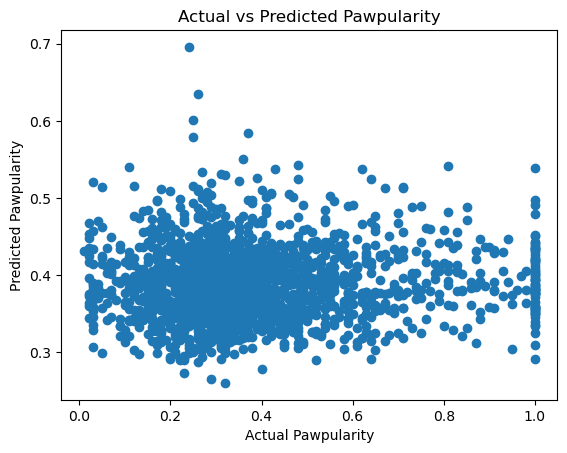

In [29]:
# Train a Random Forest model using the selected features
rf_model.fit(x_rfe, y_train)

# Make predictions on the test set
x_test_rfe = rfe.transform(x_test)
y_pred = rf_model.predict(x_test_rfe)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Selected Features: {x.columns[rfe.support_]}")
print(f"Mean Squared Error: {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a variable 'x' (features) and 'y' (target)
# Make sure to replace x and y with your actual data.
y = feature_data['Pawpularity_normalized']
x = feature_data.iloc[:, :-2]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the alpha values to test
alphas = [0.01, 0.1, 1, 10, 100, 1000]

# Define the number of features to select
num_features_range = [7, 10, 12, 15, 23] 

# Create a dictionary to store the results
results = {'alpha': [], 'num_features': [], 'mse': [], 'r2': [], 'features_selected': [], 'coefficients': []}

# Loop to iterate over alpha values and number of features
for alpha in alphas:
    for num_features in num_features_range:
        # Perform Recursive Feature Elimination (RFE)
        rfe = RFE(Ridge(alpha=alpha), n_features_to_select=num_features)
        x_rfe = rfe.fit_transform(x_train, y_train)
        
        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(x_rfe, y_train)

        # Make predictions on the test set
        x_test_rfe = rfe.transform(x_test)
        y_pred = ridge_model.predict(x_test_rfe)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results in the dictionary
        results['alpha'].append(alpha)
        results['num_features'].append(num_features)
        results['mse'].append(mse)
        results['r2'].append(r2)
        results['features_selected'].append(list(x.columns[rfe.support_]))
        results['coefficients'].append(ridge_model.coef_)

        # Print results for each combination of features
        print(f"\nAlpha: {alpha}, Num Features: {num_features}")
        print(f"Features Selected: {list(x.columns[rfe.support_])}")
        print(f"MSE: {mse}")
        print(f"R^2: {r2}")        

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40793e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40793e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40793e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 7
Features Selected: ['haralick_0', 'haralick_4', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12']
MSE: 0.04422031403005102
R^2: -0.0003786064072128781

Alpha: 0.01, Num Features: 10
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean']
MSE: 0.04420457533259943
R^2: -2.255610389334528e-05

Alpha: 0.01, Num Features: 12
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green']
MSE: 0.04417737366489858
R^2: 0.000592816423946152

Alpha: 0.01, Num Features: 15
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green']
MSE: 0.0441214729431

/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40793e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40793e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40793e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40579e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 23
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'total_entropy', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue']
MSE: 0.04406613018850217
R^2: 0.003109433420688923

Alpha: 0.1, Num Features: 7
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12']
MSE: 0.044198720921368874
R^2: 0.00010988591685245908


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40579e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40579e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 10
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean']
MSE: 0.04419690763606059
R^2: 0.00015090715040788627

Alpha: 0.1, Num Features: 12
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_green']
MSE: 0.04416911673720842
R^2: 0.0007796096206266201


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40579e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40579e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40579e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 15
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'mean_red', 'mean_green']
MSE: 0.04411209472722339
R^2: 0.00206959591164646

Alpha: 0.1, Num Features: 23
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'total_entropy', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue']
MSE: 0.04406214652335418
R^2: 0.0031995542955979284

Alpha: 1, Num Features: 7
Features Selected: ['haralick_0', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12']
MSE: 0.044193556378612185
R^2: 0.00022672131702994314

Alpha: 1, Num Features: 10
Features Selected: ['harali

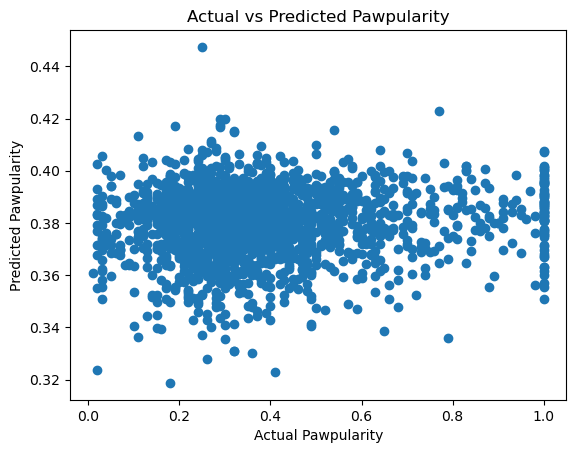


Best Combination:
alpha                                                           1000.0
num_features                                                        23
mse                                                           0.043902
r2                                                            0.006823
features_selected    [gabor_mean, haralick_0, haralick_1, haralick_...
coefficients         [-0.00038071680100055697, 1.3531542135352445e-...
Name: 29, dtype: object


In [4]:
# Plot the predictions against the actual values for the best combination
if mse == results_df['mse'].min():
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Pawpularity')
    plt.ylabel('Predicted Pawpularity')
    plt.title('Actual vs Predicted Pawpularity')
    plt.show()

# Find the combination with the minimum MSE
best_combination = results_df.loc[results_df['mse'].idxmin()]

print("\nBest Combination:")
print(best_combination)

In [12]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [200], # values tested were 50, 200
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

# Perform grid search on Random Forest
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, verbose=3)
grid.fit(x_train, y_train)

# Get the best parameters
best_aparams = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_


Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.004 total time=   7.8s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.004 total time=   7.7s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.007 total time=   9.9s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.004 total time=   7.9s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.001 total time=   7.4s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.005 total time=   7.4s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.004 total time=   7.3s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=-0.006 total time=   7.0

In [13]:
best_aparams, best_estimator

({'max_depth': 2,
  'min_samples_leaf': 8,
  'min_samples_split': 6,
  'n_estimators': 200},
 RandomForestRegressor(max_depth=2, min_samples_leaf=8, min_samples_split=6,
                       n_estimators=200))

In [14]:
# Make predictions with the best estimator
y_pred = best_estimator.predict(x_train)

# Get the model performance metrics
print('Mean squared error: %.5f' % mean_squared_error(y_train, y_pred))
print('Coefficient of determination: %.5f' % r2_score(y_train, y_pred))

Mean squared error: 0.04144
Coefficient of determination: 0.01204


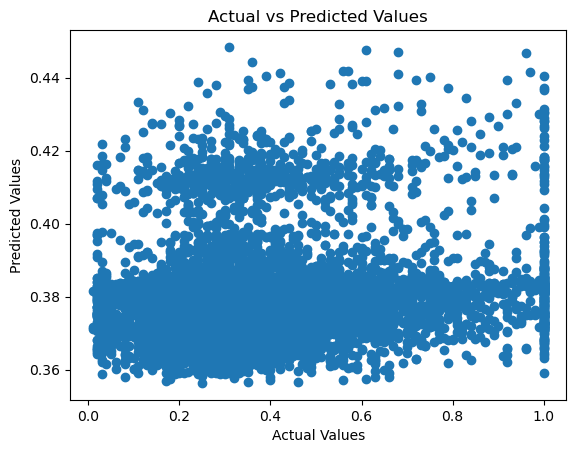

In [15]:
# Scatter plot of actual versus predicted values
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()